In [ ]:
import pandas as pd
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


In [ ]:
df=pd.read_csv('creditcard.csv')
df.head()
df.isnull().sum().max()
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,1.673327e-15,-1.247012e-15,8.190001e-16,1.207294e-15,4.887456e-15,1.437716e-15,-3.772171e-16,9.564149e-16,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
X=df.drop('Class', axis=1)
y=df['Class']
X=pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)
models = {
    'logistic_regression': LogisticRegression(max_iter=1000),
    'decision_tree': DecisionTreeClassifier(),
    'svm': SVC(),
    'knn': KNeighborsClassifier()
}
results=[]
for name, model in models.items():
  start_time=time.time()
  if name in ['KNN','SVM']:
    model.fit(X_train_scaled, y_train)
    fit_time=time.time()-start_time
    train_pred=model.predict(X_train_scaled)
    test_pred=model.predict(X_test_scaled)
  else:
    model.fit(X_train, y_train)
    fit_time=time.time()-start_time
    train_pred=model.predict(X_train)
    test_pred=model.predict(X_test)
  train_acc=accuracy_score(y_train, train_pred)
  test_acc=accuracy_score(y_test, test_pred)
  results.append({
      'model': name,
      'train_accuracy': train_acc,
      'test_accuracy': test_acc,
      'fit_time': fit_time
  })
  results_df=pd.DataFrame(results)
  print(results_df)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                 model  train_accuracy  test_accuracy   fit_time
0  logistic_regression        0.999162       0.998947  73.282079
                 model  train_accuracy  test_accuracy   fit_time
0  logistic_regression        0.999162       0.998947  73.282079
1        decision_tree        1.000000       0.999192  32.961015
                 model  train_accuracy  test_accuracy   fit_time
0  logistic_regression        0.999162       0.998947  73.282079
1        decision_tree        1.000000       0.999192  32.961015
2                  svm        0.998271       0.998280  13.207790
                 model  train_accuracy  test_accuracy   fit_time
0  logistic_regression        0.999162       0.998947  73.282079
1        decision_tree        1.000000       0.999192  32.961015
2                  svm        0.998271       0.998280  13.207790
3                  knn        0.998451       0.998367   0.047920


In [ ]:
dt_params={
    'max_depth': [3,5,7,10,None],
    'min_samples_split': [2,5,10]
}
dt_grid=GridSearchCV(DecisionTreeClassifier(), dt_params, cv=5,scoring='accuracy')
dt_grid.fit(X_train, y_train)
print('Best Decision Tree Parameters:', dt_grid.best_params_)
print('Best Decision Tree CV Score:', dt_grid.best_score_)
knn_params={'n_neighbors': [3,5,7,9],
            'weights':['uniform', 'distance']
           }
knn_grid=GridSearchCV(KNeighborsClassifier(), knn_params, cv=5, scoring='accuracy')
knn_grid.fit(X_train_scaled, y_train)
print('Best KNN parameters:', knn_grid.best_params_)
print('Best KNN CV Score:', knn_grid.best_score_)

Best Decision Tree Parameters: {'max_depth': 5, 'min_samples_split': 10}
Best Decision Tree CV Score: 0.9994162698325615
Best KNN parameters: {'n_neighbors': 3, 'weights': 'distance'}
Best KNN CV Score: 0.9995172156509907


In [ ]:
lr_params={
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'ibfgs'],
    'penalty': ['12']
}
lr_grid=GridSearchCV(LogisticRegression(max_iter=1000), lr_params, cv=5, scoring='accuracy')
lr_grid.fit(X_train, y_train)
print('Best Logistic Regression parameters:',lr_grid.best_params_)
print('Best Logistic Regression CV Score:', lr_grid.best_score_)

In [ ]:
svm_params={
    'C':[0.1,1,10,100],
    'kernel':['linear', 'rbf'],
    'gamma':['scale','auto']
}
svm_grid=GridSearchCV(SVC(), svm_params, cv=5, scoring='accuracy')
svm_grid.fit(X_train_scaled, y_train)
print('Best SVM parameters:', svm_grid.best_params_)
print('Best SVM CV Score:', svm_grid.best_score_)

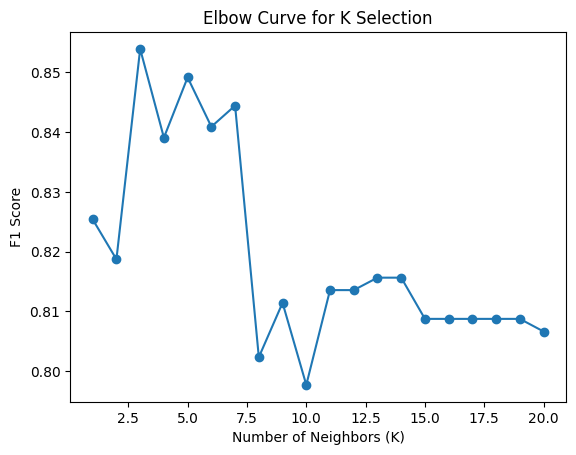

In [ ]:
#Elbow curve for K selection
from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
scores=[]
for k in range(1,21):
  knn=Pipeline([('scaler', StandardScaler(with_mean=False)), ('clf', KNeighborsClassifier(n_neighbors=k))])
  knn.fit(X_train, y_train)
  y_pred=knn.predict(X_test)
  scores.append(f1_score(y_test, y_pred))
plt.plot(range(1,21), scores, marker='o')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('F1 Score')
plt.title('Elbow Curve for K Selection')
plt.show()
